## K-Means Algoritması
![kmeans.png](https://sherrytowers.com/wp-content/uploads/2013/10/kmeans_1.jpg) <br><br>
K-means algoritması, verileri belirli bir sayıda kümeye bölmek için kullanılır. Bu kümeler benzer özelliklere sahip verileri gruplamak için kullanılır.

Algoritma, rastgele olarak belirlenen k sayısı kadar küme merkezi (centroid) başlatır. Her veri noktası, ona en yakın olan küme merkezine atanır. <br>

Veri noktalarının küme merkezlerine atanması adımı tamamlandıktan sonra, küme merkezleri güncellenir. Bu, her kümenin merkezinin, o kümedeki veri noktalarının ortalaması olarak yeniden hesaplandığı anlamına gelir. <br>

Yeni küme merkezleri belirlendikten sonra, veri noktaları tekrar atanır. Bu işlem, küme merkezleri değişmedikçe veya belirli bir durma kriterine ulaşılana kadar tekrarlanır.  <br>

K-means algoritması, verilerin doğrusal olarak ayrılabilir olduğu durumlarda iyi çalışır. Bu nedenle, verilerin önceden birbirinden ayrılması gerekebilir veya özellikleri düşük boyutlu bir uzayda temsil edilebilir. <br><br>
**K-means algoritması birçok alanda kullanılabilir. İşte bazı örnekler:** <br>
**Pazarlama:** Müşterileri farklı pazar segmentlerine ayırmak ve hedef kitleyi daha iyi anlamak için kullanılabilir. <br>

**Görüntü İşleme:** Görüntülerdeki pikselleri gruplandırmak için kullanılabilir, böylece benzer pikseller birbirlerine ait bir nesneyi veya bölgeyi temsil eder. <br>

**Biyoinformatik:** Gen ifadeleri veya protein verileri gibi büyük veri setlerini analiz etmek için kullanılabilir. <br>

**Finans:** Finansal verileri analiz ederken benzer özelliklere sahip hisse senetlerini veya portföyleri gruplandırmak için kullanılabilir. <br>

**Coğrafi Bilgi Sistemleri (CBS):** CBS verilerindeki konum tabanlı verileri kümelemek için kullanılabilir, böylece benzer özelliklere sahip konumlar birbirlerine yakın gruplar halinde olabilir. <br> <br>

Örneğimizdeki veri seti ile bir popülerlik analizi yapacağız. K-means algoritmasıyla, paylaşımların toplam tepki sayılarını kullanarak popülerlik düzeylerine göre kümelere ayıracağız. Bu sayede, en popüler paylaşımların olduğu bir kümeyi belirleyebilir ve popülerlik trendlerini analiz edebiliriz.<br>

Önce gerekli kütüphanelerimizi import edelim:


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

Verilerimizi import edelim <br>
Kaynak:[Veri Seti Link](https://www.kaggle.com/code/prashant111/k-means-clustering-with-python/input)

In [2]:
df = pd.read_csv('data/Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


**Öncelikle verimizi daha iyi anlamak için sütunlardaki verilerin ne anlama geldiklerini anlatalım:** <br>
'status_type': Paylaşımın türünü temsil eder. Örneğin, metin tabanlı bir gönderi, fotoğraf, video veya bağlantı gibi farklı paylaşım türleri.

'num_reactions': Paylaşıma verilen toplam tepki (reaksiyon) sayısını gösterir. Bu tepkiler, genellikle beğenme, sevgi, şaşırma, güldürme, üzülme veya kızgınlık gibi emoji veya butonlarla ifade edilir.<br>

'num_comments': Paylaşıma yapılan yorumların sayısını temsil eder. Bu, paylaşıma yapılan kullanıcı yorumlarının toplam sayısını ifade eder.<br>

'num_shares': Paylaşımın başkaları tarafından paylaşılma sayısını temsil eder. Bu, paylaşımın diğer kullanıcılar tarafından yeniden paylaşılma sayısını gösterir. <br>

'num_likes': Beğenme tepkisi sayısını temsil eder. Bu, paylaşıma verilen beğeni sayısını ifade eder. <br>

'num_loves': Sevgi tepkisi sayısını temsil eder. Bu, paylaşıma verilen sevgi tepkisi sayısını ifade eder. <br>

'num_wows': Şaşırma tepkisi sayısını temsil eder. Bu, paylaşıma verilen şaşırma tepkisi sayısını ifade eder. <br>

'num_hahas': Güldürme tepkisi sayısını temsil eder. Bu, paylaşıma verilen güldürme tepkisi sayısını ifade eder. <br>

'num_sads': Üzülme tepkisi sayısını temsil eder. Bu, paylaşıma verilen üzülme tepkisi sayısını ifade eder. <br>

'num_angrys': Kızgınlık tepkisi sayısını temsil eder. Bu, paylaşıma verilen kızgınlık tepkisi sayısını ifade eder. <br>

Verilerimizi analize hazır hale getirmek için öncelikle bazı işlemler yapacağız. <br>
Öncelikle en sondaki boş olan 4 sütunu temizleyelim:

In [3]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

'status_published' sütunlarında yer alan bilgiler bu çalışmada yapacağımız analiz için gerekli olmayacak, bu sebeple onları da silelim:

In [4]:
df.drop(['status_published'], axis=1, inplace=True)

Şimdi veri setimizin genel özelliklerini görüntüleyelim ve NaN değerler olup olmadığını kontrol edelim:

In [5]:
df.isnull().sum()

status_id        0
status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [6]:
df.shape

(7050, 11)

In [7]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


K-means gibi bazı kümeleme algoritmaları, verilerin sayısal olması durumunda avantajlıdır. Bunun nedeni, k-means algoritmasının veriler arasındaki uzaklığı ve benzerliği hesaplamak için öklidyen mesafesini kullanmasıdır. Öklidyen mesafesi, sayısal veriler arasındaki farkı hesaplamak için uygun bir metriktir. <br><br>

Sayısal veriler, k-means algoritmasında doğrudan kullanılabilir ve küme merkezlerini hesaplamak, kümeleme işlemini gerçekleştirmek için uygun bir şekilde işlenebilir. Verilerin sayısal olması, mesafe hesaplamalarını daha kolay hale getirir ve algoritmanın daha etkili bir şekilde çalışmasını sağlar. <br><br>
Benzer sebeplerden verilerin normalize olması da algoritmanın doğru sonuçlar vermesi için önemlidir. Normalize etmek, verilerin ölçeklerini ve değer aralıklarını birbirine yakın hale getirerek k-means algoritmasının daha dengeli bir şekilde çalışmasını sağlar. Böylece, her bir özellik veya değişken verilerin sonuç üzerinde ağırlığını eşit bir şekilde taşır ve kümeleme sonuçları daha adil bir şekilde elde edilir.<br><br>
Bu sebeple 'status_type' sütunundaki kategorik verileri nümerik veriye dönüştürelim ve normalize edelim:

In [8]:
X = df.iloc[:, 1:].copy()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


In [10]:
#Normalize işlemi
cols = X.columns
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


K-Means algoritmasında k değeri yani verilerimizi kaç kümede gruplayacağımız bilgisi kritiktir. <br><br>

**Elbow Tekniği**<br>
Elbow tekniği, veri analizi ve makine öğrenimi alanında kullanılan bir yöntemdir. Bu yöntem, doğru küme sayısını belirlemek için kullanılır. Kümeleme algoritmalarında sıklıkla kullanılan Elbow tekniği, veri kümesini farklı küme sayılarıyla kümeleme yapar ve her bir küme sayısı için bir değerlendirme metriği hesaplar. Bu metrik genellikle küme içi varyansı veya küme merkezlerinden verilere olan uzaklığın toplamını temsil eder. Grafiksel olarak gösterildiğinde, küme sayısı arttıkça varyansın veya uzaklığın toplamının hızla düştüğü bir bölge vardır. Ancak, bir noktadan sonra bu düşüş hızı yavaşlar ve grafikte bir dirsek şeklinde bükülme (elbow) meydana gelir. Bu nokta, doğru küme sayısının bir tahminini sağlar. Elbow tekniği, veri kümesindeki yapının ve kümeleme algoritmasının doğruluğunu anlamak için kullanılabilir, ancak kesin bir doğru küme sayısı sağlamaz.
<br><br>
Bu optimum k değerini belirlemek için 1'den 10'a kadar değişen k değerlerine karşılık gelen SSE değerlerini gösteren bir grafik ile inceleme yapacağız. SSE değerine 'distortion' veya 'inertia' da deniliyor. Bu değerin küçük çıkması modelimizin başarılı olduğunu gösterir. <br><br>
**SSE hesaplaması şu şekilde yapılır:** Her veri noktasının küme merkezine olan mesafesi alınır ve bu mesafe değeri kare alınır. Bu işlem tüm veri noktaları için yapılır ve karelerin toplamı alınır. Böylece, her bir veri noktasının hata karesi elde edilir. Son olarak, tüm veri noktalarının hata kareleri toplanarak toplam hata karesi (SSE) değeri elde edilir.

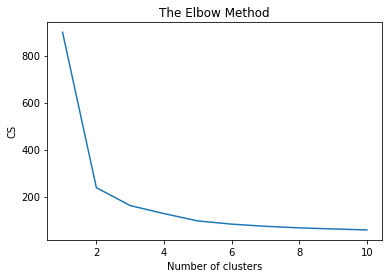

In [11]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

**Grafik Yorumu:** Verilerimizin kümelenmesi için 2 küme seçmek diğerlerine göre daha verimli sonuçlar doğurabilir.

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(init = 'k-means++', n_clusters = 2, n_init = 12) 
#k_means nesnesi, KMeans sınıfının bir örneğini oluşturur. Bu örneğin yapılandırması, init = 'k-means++' ile başlatılır.
#'k-means++' başlangıç noktalarını daha iyi seçmek için bir yöntemdir. n_clusters = 2 ile 2 küme oluşturulacağı belirtilir
#ve n_init = 12 ise farklı başlangıç noktalarıyla 12 kez K-means algoritmasının çalıştırılacağını ifade eder.


kmeans.fit(X)
labels = kmeans.labels_
#labels = k_means.labels_ satırı, her bir veri noktasının ait olduğu küme etiketlerini içeren bir dizi oluşturur.
#Her veri noktası, en yakın küme merkezine dayanarak bir etiket alır.
#Bu etiketler, veri noktalarının hangi kümelere ait olduğunu belirtir.
labels

array([1, 0, 1, ..., 0, 0, 0])

In [13]:
df['Clus_km'] = labels
df

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Clus_km
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,1
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,0
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,1
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,0
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,0
7047,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,0
7048,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0,0


In [14]:
df.groupby('Clus_km').mean()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
Clus_km,,,,,,,,,
0,184.024822,15.844404,2.580556,181.541715,1.428637,0.677545,0.188462,0.140427,0.045047
1,304.421638,560.493146,100.381993,269.050019,30.945165,2.275658,1.515376,0.410152,0.223046


Yukarıdaki dataframe'de görülebileceği üzere gönderilerin aldığı tepkilere/beğenme sayılarına vs... göre az popüler grup (Clus_km = 0) ile görece daha popüler grup (Clus_km = 1) şeklinde gönderileri kümelemiş olduk. <br> Bu veri setinde gönderin aldığı tepkiler dışında gönderilerle ilgili gönderi tipi (video, fotoğraf vs...) bilgisi var. Bu iki veriyi kullanarak en çok hangi tipte paylaşılan gönderilerin popüler olduğunu belirleyebiliriz:

In [20]:
result = df.groupby('status_type')['Clus_km'].value_counts()
print(result)

status_type  Clus_km
link         0            63
photo        0          4288
status       1           365
video        1          2334
Name: Clus_km, dtype: int64


**Analiz Yorumu :** Bir şirketin pazarlama bölümünde çalışıyor olsaydık böyle bir analizden sonra sosyal medya platformlarında video tipinde paylaşımların sayısının artırılmasını önerebilirdik.

Ana verimizde bulunan gönderi_id numarasından gönderilerin başka özelliklerine de ulaşarak, popüler ve daha az popüler kümesindeki gönderilerin nitelikleri incelenip daha fazla pazarlama stratejisi geliştirilebilir !!